In [1]:
import pandas as pd
import numpy as np

In [2]:
! ls 

MMI_analysis-Copy1.ipynb
MMI_analysis.ipynb
README.md
alpha.ipynb
beta.ipynb
differential_abundance_higher_taxonomic_levels.ipynb
differential_abundance_species.ipynb
differential_prevalence.ipynb
gbs_cohort_metadata_2024-06-20.txt
gbs_cohort_taxonomy_raw_counts_2024-06-20.txt
humann3.ipynb
humann_genefamilies_clean.tsv
humann_pathabundance_clean.tsv
permanova.ipynb
permanova_clr_transformed.csv
permanova_metadata.csv
uniprotkb_keyword_Antibiotic_resistance_2024_07_31.tsv
uniprotkb_scfa_2024_07_31.tsv.gz


In [3]:
meta = pd.read_csv("gbs_cohort_metadata_2024-06-20.txt", sep="\t", index_col=1)
meta

,magic_id,time_cat,del_method,matabx_expo_cat,dist_tp,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_timeline.prior..during..after.,...,parity_n,laboronset_type,multip_yn,rom_hr,sepsisrisk,gbs_result,motherrace,motherethnicity,maternalheight,weight_prepregnancy_2
sample_id,,,,,,,,,,,,,,,,,,,,,
magic.0022,101,1,Vaginal,No antibiotics,NaN,NaN,NaN,3,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.1142,101,12,Vaginal,No antibiotics,0.11,2017-12-11,1330,48,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0519,101,6,Vaginal,No antibiotics,0.09,2017-06-11,NaN,24,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0051,102,1,Vaginal,No antibiotics,0.01,2017-01-11,2130,4,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
magic.1120,102,12,Vaginal,No antibiotics,0.01,2017-12-12,NaN,48,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,599,0,Vaginal,No antibiotics,0.26,2019-09-18,2000,1,regular,NaN,...,1,Induced,No,28.17,0.28,Negative,Asian,Unknown / Not Reported,161.3,125.0
magic.5187,601,0,C-section,Other antibiotics,0.23,2019-09-20,2210,1,regular,NaN,...,1,NaN,No,0.00,0.03,Negative,White,Non-Hispanic,162.6,145.0
magic.5176,603,0,Vaginal,No antibiotics,0.26,2019-09-25,1025,1,regular,NaN,...,2,Spontaneous,No,4.72,0.14,Negative,White,Non-Hispanic,162.6,135.0


In [4]:
meta.columns

Index(['magic_id', 'time_cat', 'del_method', 'matabx_expo_cat', 'dist_tp',
       'Date_Collected', 'Time_Collected', 'Timeline_Weeks', 'Abx_regular',
       'Abx_timeline.prior..during..after.', 'abx_day', 'Consistency', 'Color',
       'Amount', 'dob', 'babysex', 'gestational_age_wk',
       'gestational_age_days', 'weight1', 'sizeforgestationalage', 'icn',
       'icnabx', 'mat_ageatadm', 'gravidity_n', 'parity_n', 'laboronset_type',
       'multip_yn', 'rom_hr', 'sepsisrisk', 'gbs_result', 'motherrace',
       'motherethnicity', 'maternalheight', 'weight_prepregnancy_2'],
      dtype='object')

In [12]:
species = pd.read_csv("gbs_cohort_taxonomy_raw_counts_2024-06-20.txt", sep="\t", index_col=0) + 1
species = species.div(species.sum(axis=1), axis=0)
species.sum(axis=1)

magic.0022    1.0
magic.1142    1.0
magic.0519    1.0
magic.0051    1.0
magic.1120    1.0
             ... 
magic.5263    1.0
magic.5187    1.0
magic.5176    1.0
magic.5175    1.0
magic.5088    1.0
Length: 1381, dtype: float64

In [31]:
from scipy.stats import ranksums

def get_pvalues(gbs, no_gbs):
    p_info = []
    for i, d in tqdm(enumerate(info_df.columns[:-2])):
        p = ranksums(gbs[d], no_gbs[d]).pvalue
        p_info.append({
            "taxa" : d,
            "p" : p,
        })
        
    p_info_df = pd.DataFrame(p_info)
    
    p_info_df["q"] = p_info_df["p"] * info_df.shape[1]
    return p_info_df

In [37]:
import math

def analyze_timepoint(timepoint):
    info_df_curr = info_df[info_df["time"] == timepoint]
    gbs = info_df_curr[info_df_curr["gbs"]]
    no_gbs = info_df_curr[~info_df_curr["gbs"]]
    
    p_info_df = get_pvalues(gbs, no_gbs)
    
    significant = p_info_df[p_info_df["q"] < 0.05].set_index("taxa").sort_values("q")
    
    if significant.shape[0] == 0:
        display(p_info_df.sort_values("p"))
        return
    
    cols = 4
    rows = math.ceil(significant.shape[0] / cols)

    figs, axs = plt.subplots(rows, cols, figsize=(20, 5 * rows), dpi=200)

    for i, s in enumerate(significant.index):
        if rows == 1:
            ax = axs[i]
        else:
            ax = axs[i // cols][i % cols]
        ax.boxplot(gbs[s], positions=[0])
        ax.boxplot(no_gbs[s], positions=[1])
        ax.scatter(np.random.normal(0, 0.01, len(gbs[s])), gbs[s], c="orange", s=1)
        ax.scatter(np.random.normal(1, 0.01, len(no_gbs[s])), no_gbs[s], c="orange", s=1)

        ylim = ax.get_ylim()
        max_ = ylim[1]
        range_ = ylim[1] - ylim[0]

        ax.set_ylim((ylim[0], ylim[1] + range_ * 0.3))
        ax.set_xticks([0, 1], [f"GBS \n(n = {len(gbs[s])})", f"No abx \n(n = {len(no_gbs[s])})"])

        q = significant.loc[s]["q"]
        text = '$q = %s$' % float('%.2g' % q) if q < 0.05 else "n.s."
        ax.text(0.5, max_ + range_ * 0.2, s.split(";")[-1], horizontalalignment="center", size=12)
        ax.text(0.5, max_ + range_ * 0.1, text, horizontalalignment="center", size=12)
        
    plt.show()

level = g
0


2712it [00:01, 1421.65it/s]


,taxa,p,q
1995,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.000033,0.090896
777,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,0.000101,0.274435
2449,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.000164,0.446071
2461,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.000278,0.753177
1808,k__Bacteria;p__Fusobacteriota;c__Fusobacteriia...,0.000283,0.768857
...,...,...,...
1640,k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...,0.989399,2685.227537
1550,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...,0.991519,2690.981786
2424,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.995759,2702.490730
1374,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.997880,2708.245345


1


2712it [00:01, 1493.11it/s]


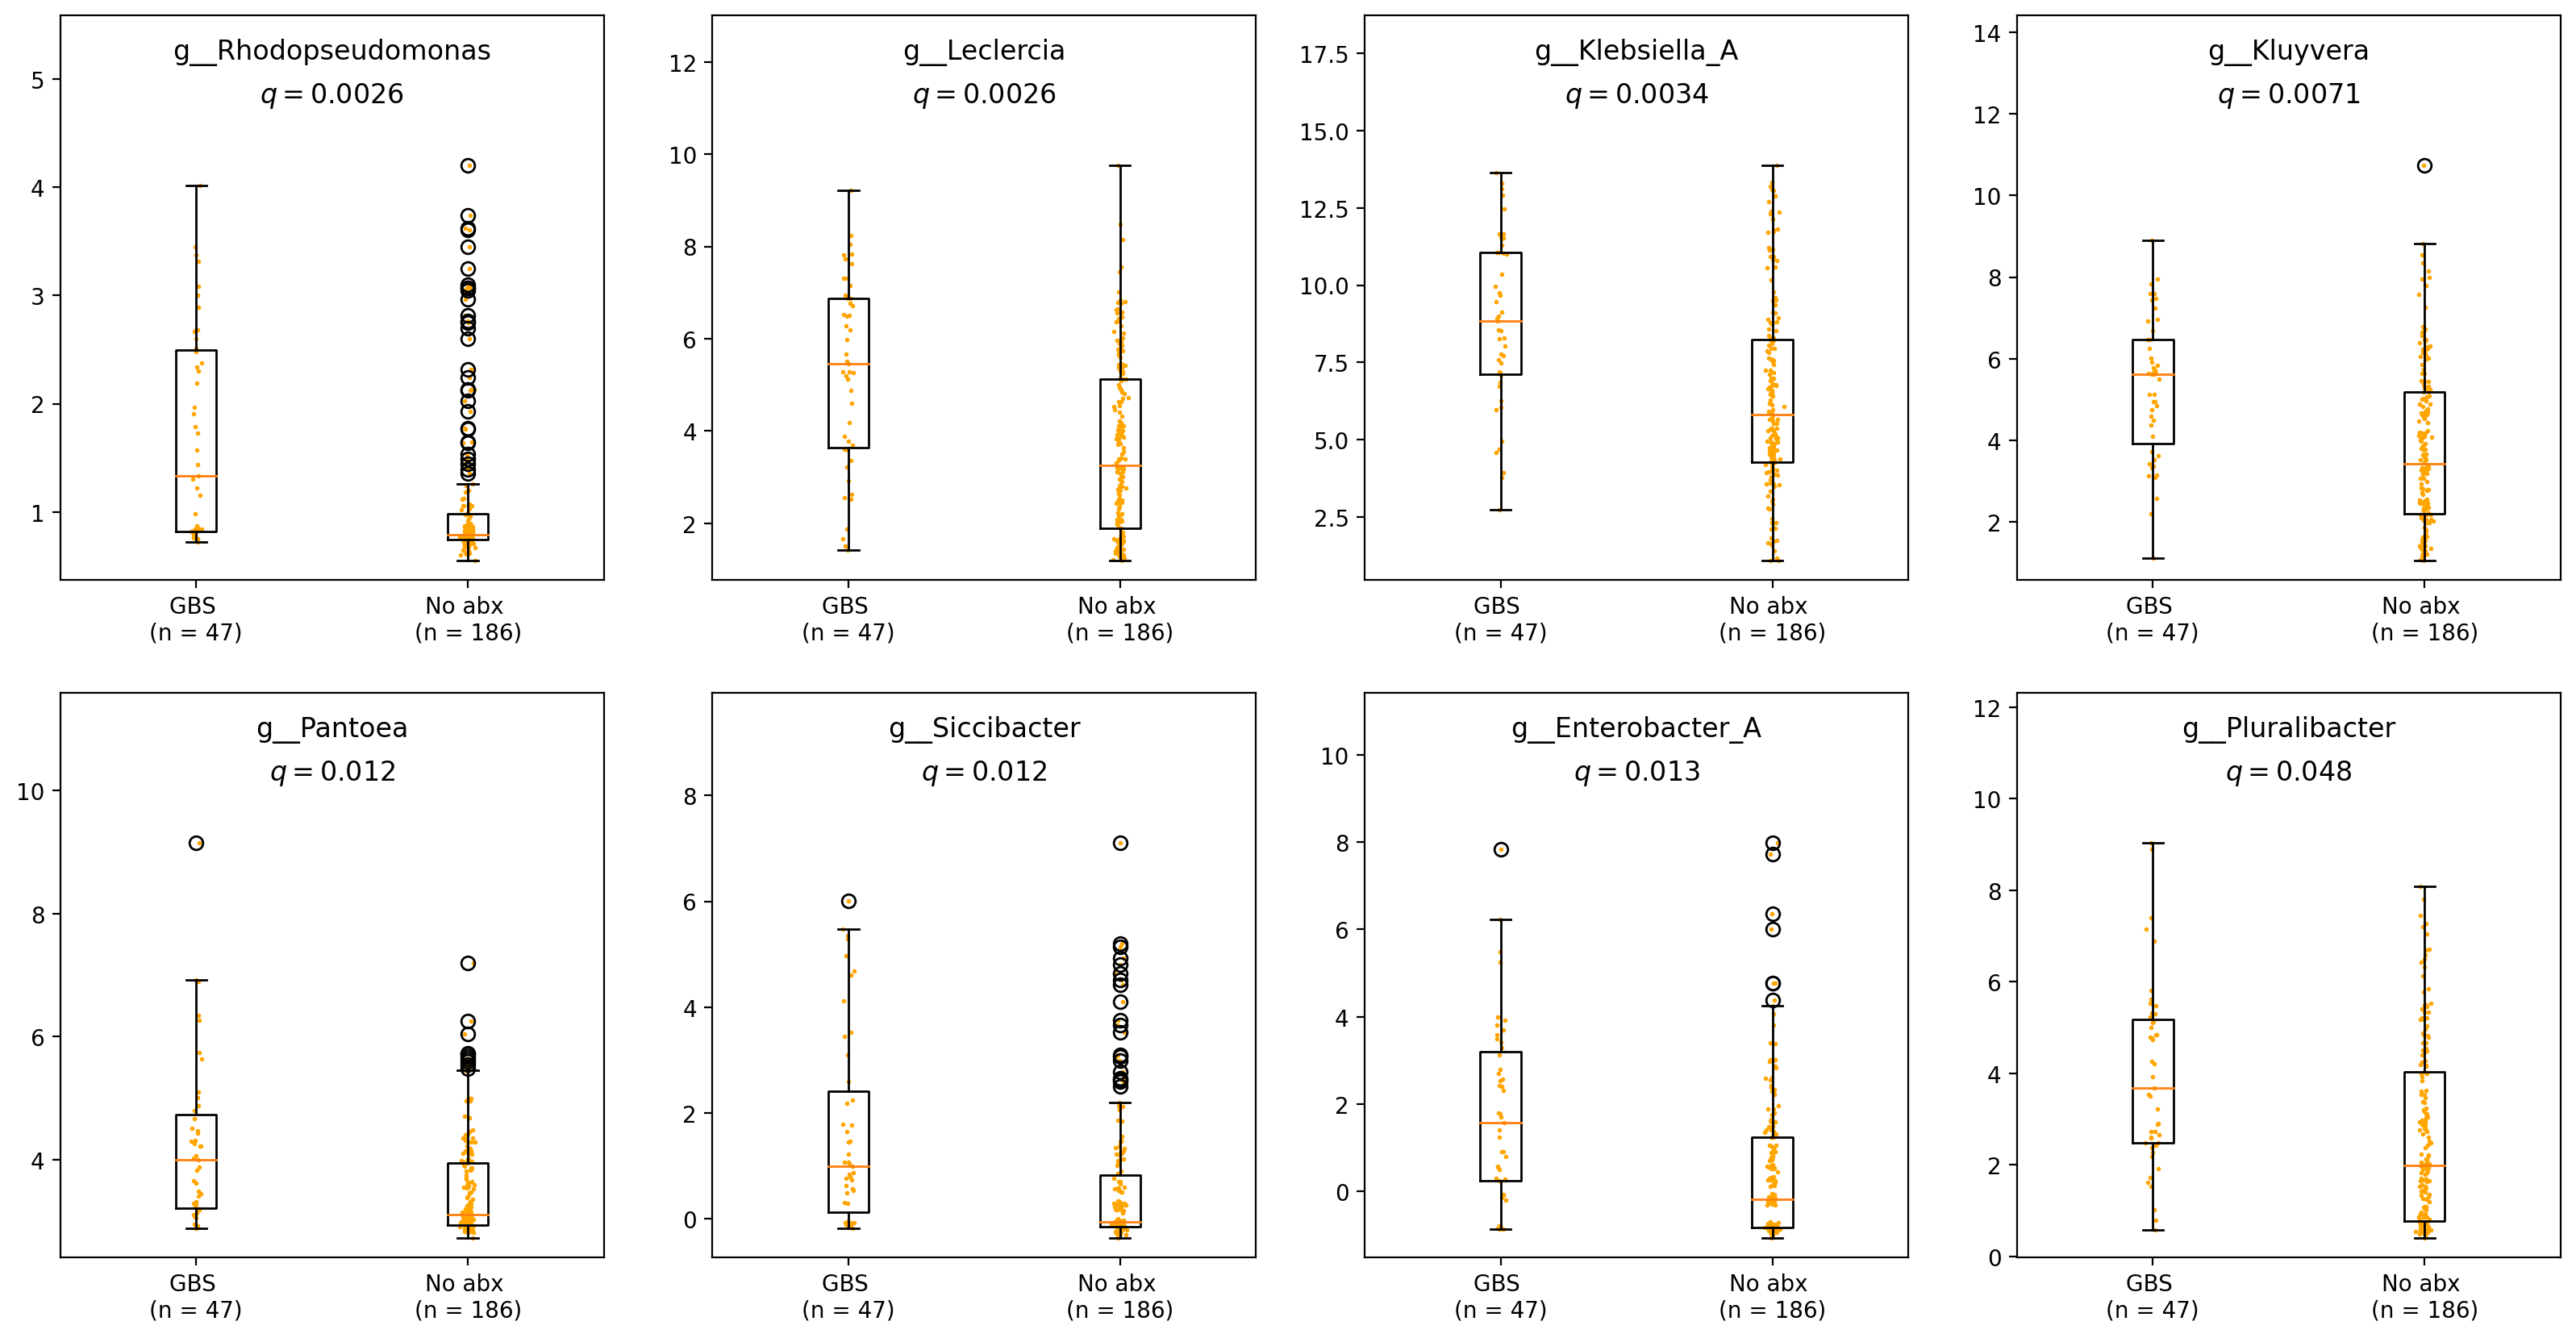

6


2712it [00:01, 1388.09it/s]


,taxa,p,q
178,k__Bacteria;p__Actinobacteriota;c__Actinomycet...,0.000411,1.114732
1780,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.001578,4.281798
1177,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.002060,5.590526
2370,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.002371,6.433912
1252,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.002577,6.994312
...,...,...,...
1907,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.998881,2710.962780
880,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,0.998881,2710.962780
1620,k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...,0.998881,2710.962780
1630,k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...,0.998881,2710.962780


12


2712it [00:02, 989.55it/s] 


,taxa,p,q
314,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000616,1.672974
1130,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.001453,3.942460
1252,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.001725,4.681323
1355,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.003073,8.339317
1227,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.004508,12.235404
...,...,...,...
882,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,0.992011,2692.318656
1251,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.994674,2699.545637
1798,k__Bacteria;p__Fusobacteriota;c__Fusobacteriia...,0.994674,2699.545637
1221,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.997337,2706.772778


18


2712it [00:01, 1551.33it/s]


,taxa,p,q
1347,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.004647,12.612975
314,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.010173,27.608859
1392,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.010606,28.784384
2378,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.012005,32.582447
1605,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.018277,49.602786
...,...,...,...
1829,k__Bacteria;p__Myxococcota_A;c__UBA9160;o__UBA...,1.000000,2714.000000
599,k__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,1.000000,2714.000000
237,k__Bacteria;p__Actinobacteriota;c__Actinomycet...,1.000000,2714.000000
1162,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,1.000000,2714.000000


24


2712it [00:01, 1573.40it/s]


,taxa,p,q
1604,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.000455,1.234420
1769,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.001408,3.822347
1609,k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...,0.004661,12.650196
1424,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.005256,14.264688
1300,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.005578,15.139804
...,...,...,...
794,k__Bacteria;p__Firmicutes;c__Bacilli;o__Erysip...,0.996916,2705.629375
2202,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.996916,2705.629375
362,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1.000000,2714.000000
1768,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,1.000000,2714.000000


level = f
0


634it [00:00, 1675.85it/s]


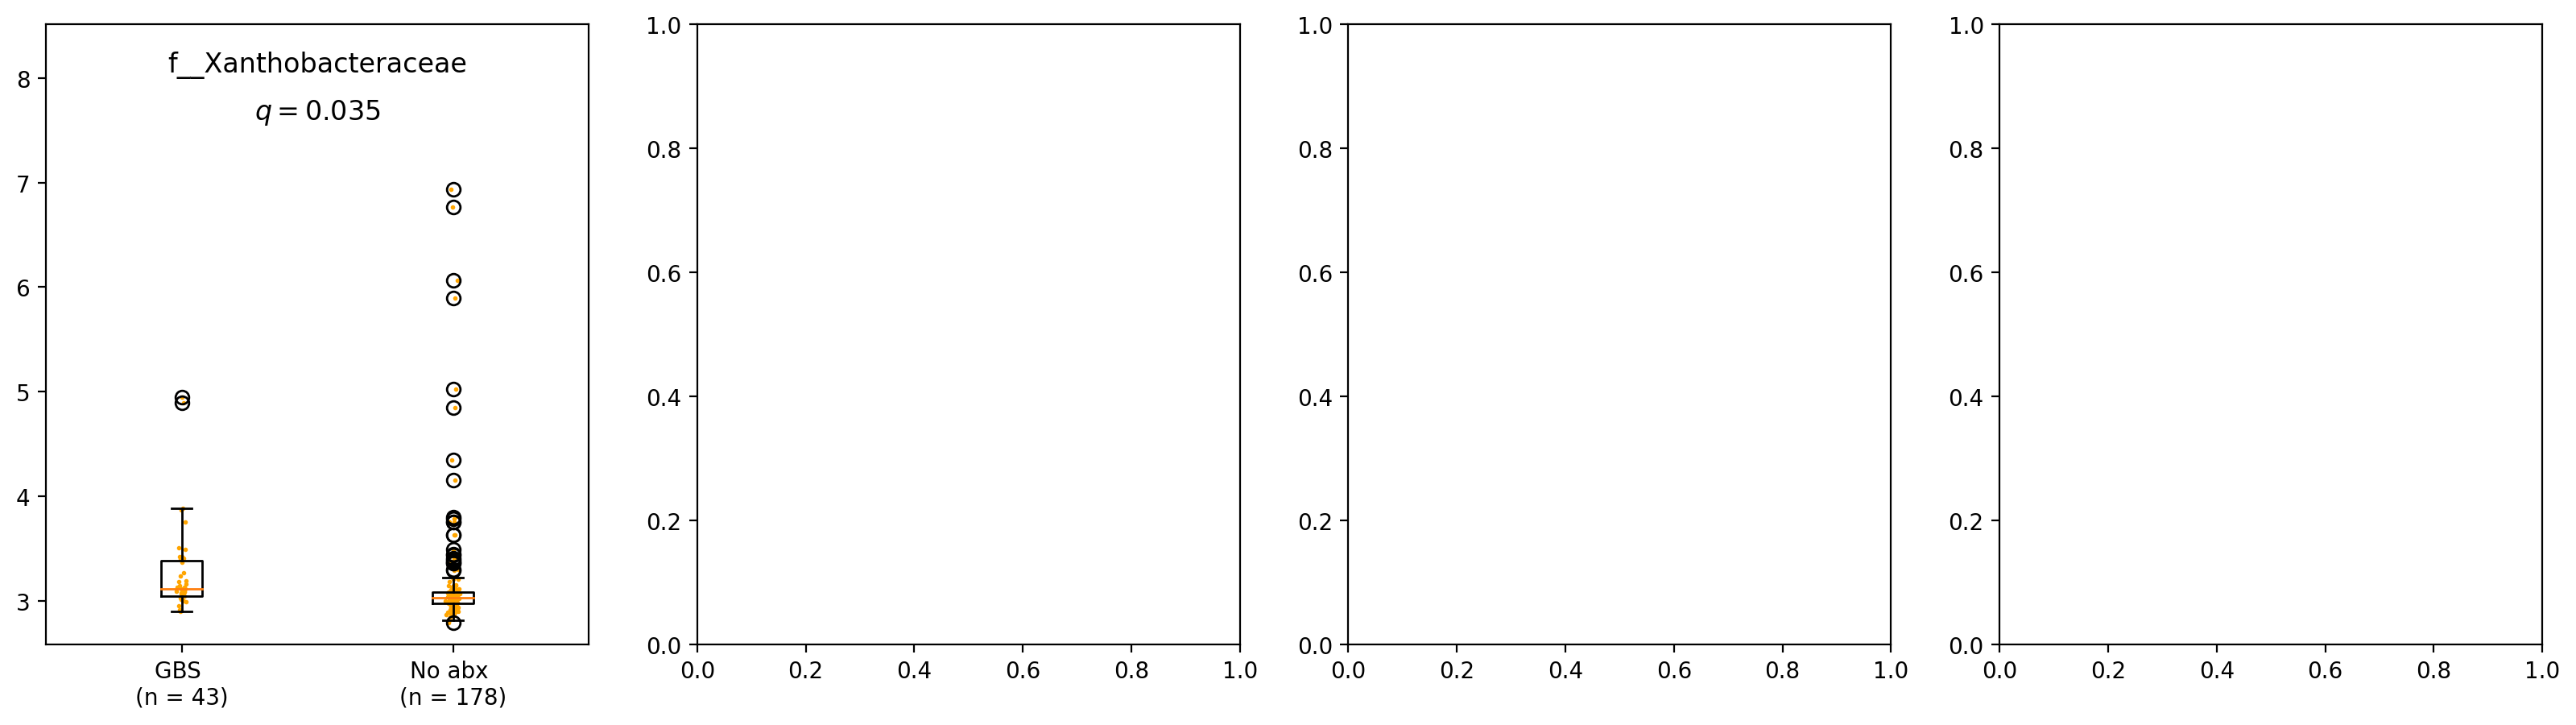

1


634it [00:00, 1591.55it/s]


,taxa,p,q
96,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000092,0.058323
494,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.000207,0.131541
586,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.000470,0.298811
542,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.000492,0.312668
78,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000685,0.435413
...,...,...,...
150,k__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,0.971019,617.568096
193,k__Bacteria;p__Firmicutes;c__Alicyclobacillia;...,0.971019,617.568096
282,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.974882,620.024809
295,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__M...,0.978745,622.481896


6


634it [00:00, 1207.40it/s]


,taxa,p,q
532,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.002601,1.654270
166,k__Bacteria;p__Dependentiae;c__Babeliae;o__Bab...,0.003390,2.155928
98,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.007233,4.600033
188,k__Bacteria;p__Elusimicrobiota;c__Elusimicrobi...,0.007733,4.918460
132,k__Bacteria;p__Campylobacterota;c__Campylobact...,0.008975,5.708197
...,...,...,...
491,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.969792,616.787514
627,k__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,0.972028,618.210055
207,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,0.978740,622.478471
103,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.978740,622.478471


12


634it [00:00, 1081.87it/s]


,taxa,p,q
349,k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...,0.002756,1.752667
586,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.010471,6.659669
69,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.012194,7.755636
76,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.012903,8.206125
70,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.018130,11.530581
...,...,...,...
533,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.989349,629.225667
403,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.989349,629.225667
598,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.992011,630.919184
431,k__Bacteria;p__Myxococcota;c__Myxococcia;o__My...,0.997337,634.306370


18


634it [00:00, 1023.50it/s]


,taxa,p,q
344,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.007237,4.602863
404,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.008060,5.126375
396,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.033916,21.570344
150,k__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,0.042666,27.135621
405,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.048947,31.130444
...,...,...,...
257,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;...,0.988448,628.653169
251,k__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f...,0.988448,628.653169
307,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.994224,632.326488
36,k__Bacteria;p__Actinobacteriota;c__Actinomycet...,0.994224,632.326488


24


634it [00:00, 1072.22it/s]


,taxa,p,q
343,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.000496,0.315532
299,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.001486,0.944894
320,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__S...,0.018567,11.808755
202,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,0.020169,12.827671
621,k__Bacteria;p__Verrucomicrobiota;c__Lentisphae...,0.020588,13.094083
...,...,...,...
405,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.990747,630.115389
22,k__Bacteria;p__Actinobacteriota;c__Actinomycet...,0.993832,632.076877
307,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.993832,632.076877
164,k__Bacteria;p__Deinococcota;c__Deinococci;o__D...,0.993832,632.076877


level = o
0


277it [00:00, 1569.25it/s]


,taxa,p,q
101,k__Bacteria;p__Firmicutes;c__Bacilli;o__Paenib...,0.000191,0.053190
121,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...,0.001231,0.343573
127,k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...,0.001389,0.387503
107,k__Bacteria;p__Firmicutes;c__Bacilli;o__Thermo...,0.002051,0.572364
205,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.004069,1.135349
...,...,...,...
206,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.894293,249.507762
90,k__Bacteria;p__Firmicutes;c__Bacilli;o__Achole...,0.906916,253.029632
126,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.913237,254.793087
58,k__Bacteria;p__Chloroflexota;c__Chloroflexia;o...,0.940685,262.451006


1


277it [00:00, 645.91it/s]


,taxa,p,q
13,k__Bacteria;p__Actinobacteriota;c__Actinomycet...,0.000243,0.067842
35,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000310,0.086628
21,k__Bacteria;p__Actinobacteriota;c__Coriobacter...,0.000453,0.126401
107,k__Bacteria;p__Firmicutes;c__Bacilli;o__Thermo...,0.000898,0.250622
111,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__C...,0.001640,0.457676
...,...,...,...
94,k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevib...,0.857758,239.314386
207,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.869182,242.501868
7,k__Archaea;p__Thermoplasmatota;c__Thermoplasma...,0.909369,253.713876
125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.938222,261.763983


6


277it [00:00, 1267.70it/s]


,taxa,p,q
224,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.001325,0.369691
72,k__Bacteria;p__Dependentiae;c__Babeliae;o__Bab...,0.001874,0.522838
84,k__Bacteria;p__Elusimicrobiota;c__Elusimicrobi...,0.003514,0.980478
51,k__Bacteria;p__Campylobacterota;c__Campylobact...,0.007053,1.967686
18,k__Bacteria;p__Actinobacteriota;c__Actinomycet...,0.017839,4.976975
...,...,...,...
265,k__Bacteria;p__Synergistota;c__Synergistia;o__...,0.938511,261.844523
7,k__Archaea;p__Thermoplasmatota;c__Thermoplasma...,0.956377,266.829210
272,k__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,0.967555,269.947908
94,k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevib...,0.974265,271.820021


12


277it [00:00, 1151.78it/s]


,taxa,p,q
34,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.012663,3.532883
145,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.020546,5.732248
113,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.024061,6.712993
37,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.030822,8.599244
201,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.034064,9.503757
...,...,...,...
10,k__Bacteria;p__Acidobacteriota;c__Blastocatell...,0.994674,277.514087
63,k__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,0.994674,277.514087
184,k__Bacteria;p__Patescibacteria;c__Gracilibacte...,0.994674,277.514087
65,k__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,0.994674,277.514087


18


277it [00:00, 1416.95it/s]


,taxa,p,q
126,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.006634,1.850858
148,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.028274,7.888419
123,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.073764,20.580265
272,k__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,0.097364,27.164687
13,k__Bacteria;p__Actinobacteriota;c__Actinomycet...,0.103353,28.835524
...,...,...,...
99,k__Bacteria;p__Firmicutes;c__Bacilli;o__ML615J-28,0.994224,277.388507
91,k__Bacteria;p__Firmicutes;c__Bacilli;o__Aneuri...,0.994224,277.388507
124,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.994224,277.388507
85,k__Bacteria;p__Elusimicrobiota;c__Endomicrobia...,0.994224,277.388507


24


277it [00:00, 1430.34it/s]


,taxa,p,q
125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.000448,0.125068
269,k__Bacteria;p__Verrucomicrobiota;c__Lentisphae...,0.008575,2.392345
120,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__S...,0.018567,5.180256
173,k__Bacteria;p__Myxococcota;c__Bradimonadia;o__...,0.038273,10.678033
77,k__Bacteria;p__Desulfobacterota;c__Desulfovibr...,0.044423,12.394069
...,...,...,...
97,k__Bacteria;p__Firmicutes;c__Bacilli;o__Halopl...,0.916876,255.808481
201,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.919944,256.664482
128,k__Bacteria;p__Firmicutes_A;c__Mahellia_A;o__C...,0.950683,265.240695
209,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.990747,276.418543


level = c
0


122it [00:00, 1470.07it/s]


,taxa,p,q
58,k__Bacteria;p__Firmicutes_A;c__Clostridia_A,0.002033,0.252122
104,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.002344,0.290628
2,k__Archaea;p__Halobacteriota;c__Halobacteria,0.004809,0.596263
112,k__Bacteria;p__Spirochaetota;c__Leptospirae,0.009569,1.186503
40,k__Bacteria;p__Dependentiae;c__Babeliae,0.011759,1.458136
...,...,...,...
44,k__Bacteria;p__Desulfobacterota;c__Desulfovibr...,0.611749,75.856867
7,k__Archaea;p__Thermoplasmatota;c__Thermoplasmata,0.638088,79.122905
86,k__Bacteria;p__Myxococcota;c__Myxococcia,0.763952,94.730050
55,k__Bacteria;p__Firmicutes;c__Bacilli,0.790433,98.013734


1


122it [00:00, 1583.27it/s]


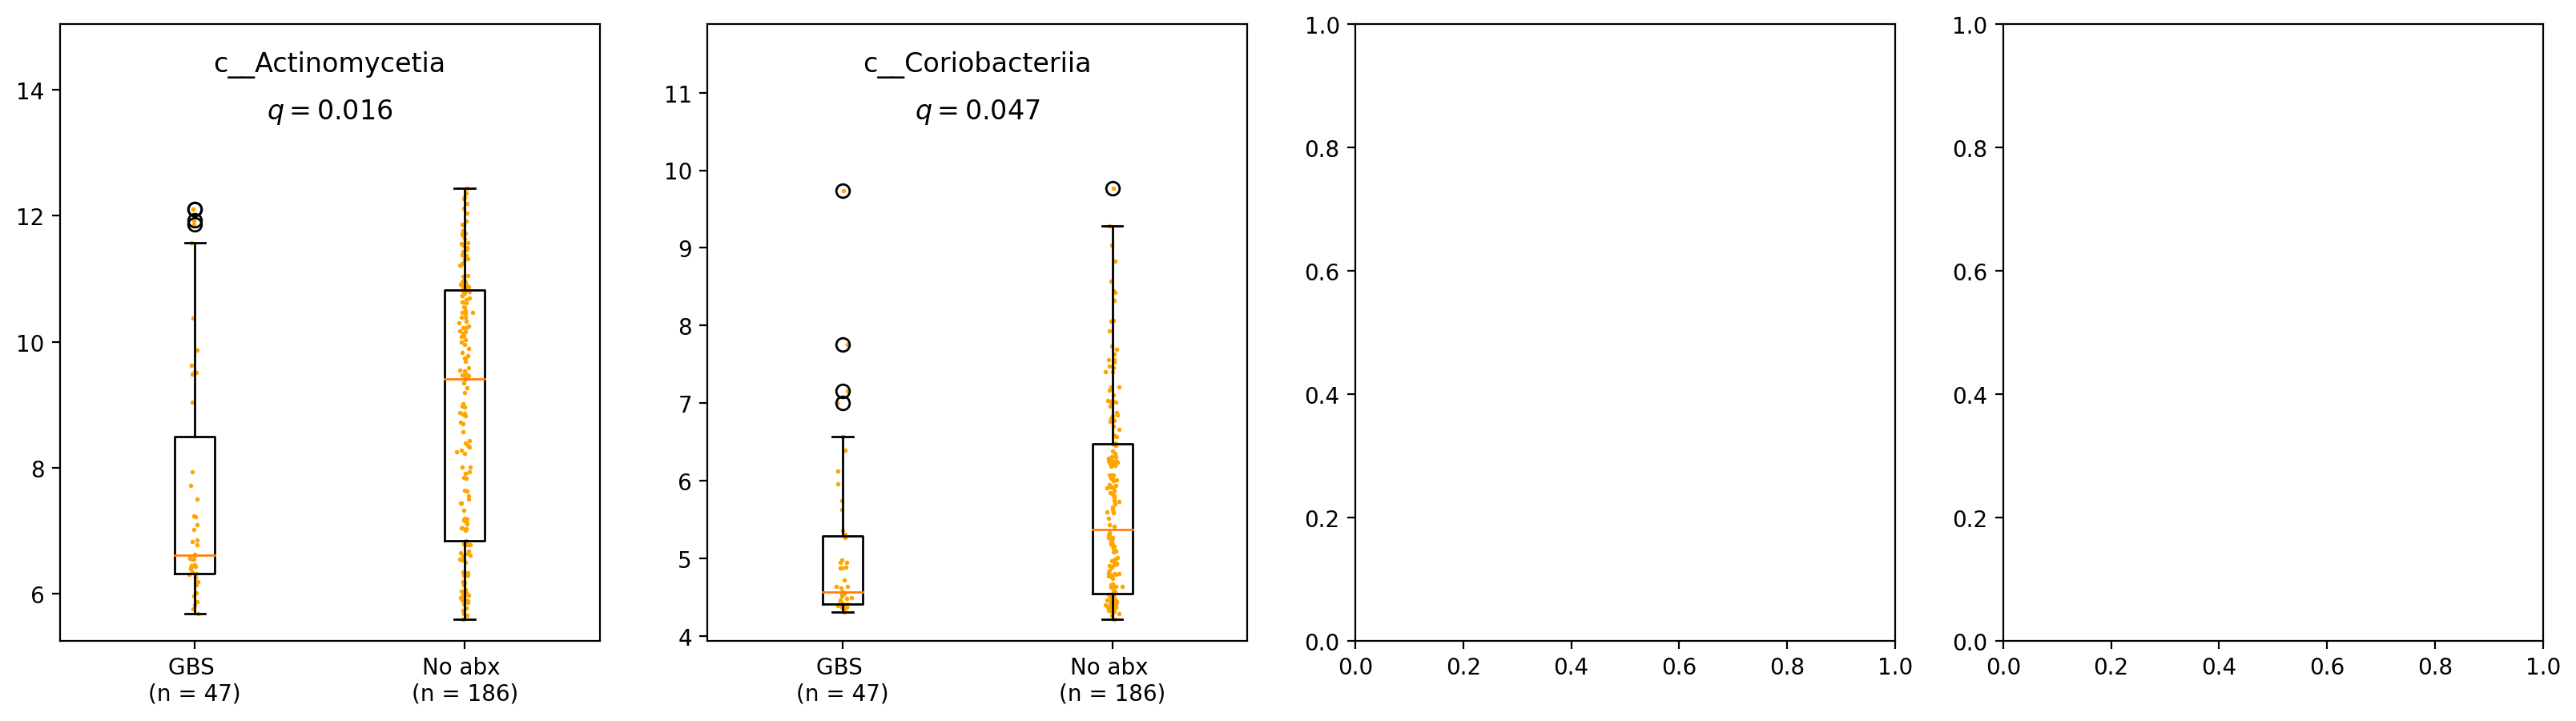

6


122it [00:00, 1516.47it/s]


,taxa,p,q
40,k__Bacteria;p__Dependentiae;c__Babeliae,0.003153,0.390961
50,k__Bacteria;p__Elusimicrobiota;c__Elusimicrobia,0.004352,0.539674
31,k__Bacteria;p__Campylobacterota;c__Campylobact...,0.005653,0.700919
86,k__Bacteria;p__Myxococcota;c__Myxococcia,0.036506,4.526803
45,k__Bacteria;p__Desulfobacterota;c__Desulfuromo...,0.046255,5.735597
...,...,...,...
34,k__Bacteria;p__Chloroflexota;c__Chloroflexia,0.771561,95.673602
7,k__Archaea;p__Thermoplasmatota;c__Thermoplasmata,0.834461,103.473147
115,k__Bacteria;p__Synergistota;c__Synergistia,0.878492,108.933043
44,k__Bacteria;p__Desulfobacterota;c__Desulfovibr...,0.891782,110.580950


12


122it [00:00, 1582.13it/s]


,taxa,p,q
21,k__Bacteria;p__Bacteroidota;c__Bacteroidia,0.014563,1.805873
57,k__Bacteria;p__Firmicutes_A;c__Clostridia,0.033504,4.154482
118,k__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria,0.104085,12.906482
55,k__Bacteria;p__Firmicutes;c__Bacilli,0.153161,18.992015
53,k__Bacteria;p__Fibrobacterota;c__Fibrobacteria,0.155091,19.231236
...,...,...,...
58,k__Bacteria;p__Firmicutes_A;c__Clostridia_A,0.922895,114.438976
102,k__Bacteria;p__Planctomycetota;c__Planctomycetes,0.928198,115.096508
98,k__Bacteria;p__Patescibacteria;c__Saccharimonadia,0.946781,117.400795
112,k__Bacteria;p__Spirochaetota;c__Leptospirae,0.962732,119.378807


18


122it [00:00, 1447.61it/s]


,taxa,p,q
119,k__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,0.083602,10.366637
13,k__Bacteria;p__Actinobacteriota;c__Actinomycetia,0.100323,12.440075
14,k__Bacteria;p__Actinobacteriota;c__Coriobacteriia,0.116207,14.409607
21,k__Bacteria;p__Bacteroidota;c__Bacteroidia,0.135892,16.850550
42,k__Bacteria;p__Desulfobacterota;c__Desulfobact...,0.160201,19.864895
...,...,...,...
104,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,0.850706,105.487504
118,k__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria,0.913530,113.277693
58,k__Bacteria;p__Firmicutes_A;c__Clostridia_A,0.959585,118.988566
53,k__Bacteria;p__Fibrobacterota;c__Fibrobacteria,0.959585,118.988566


24


122it [00:00, 1534.42it/s]


,taxa,p,q
118,k__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria,0.011096,1.375934
85,k__Bacteria;p__Myxococcota;c__Bradimonadia,0.030411,3.770953
44,k__Bacteria;p__Desulfobacterota;c__Desulfovibr...,0.040488,5.020566
98,k__Bacteria;p__Patescibacteria;c__Saccharimonadia,0.129700,16.082743
31,k__Bacteria;p__Campylobacterota;c__Campylobact...,0.150441,18.654626
...,...,...,...
7,k__Archaea;p__Thermoplasmatota;c__Thermoplasmata,0.880168,109.140888
39,k__Bacteria;p__Deinococcota;c__Deinococci,0.910744,112.932234
43,k__Bacteria;p__Desulfobacterota;c__Desulfobulbia,0.923014,114.453696
59,k__Bacteria;p__Firmicutes_A;c__Mahellia_A,0.953762,118.266514


level = p
0


58it [00:00, 1334.10it/s]


,taxa,p,q
20,k__Bacteria;p__Dependentiae,0.015593,0.935577
28,k__Bacteria;p__Firmicutes_A,0.015938,0.956276
14,k__Bacteria;p__Caldatribacteriota,0.020199,1.211920
35,k__Bacteria;p__Fusobacteriota,0.027404,1.644267
2,k__Archaea;p__Halobacteriota,0.027779,1.666742
56,k__Bacteria;p__Verrucomicrobiota_A,0.032629,1.957767
15,k__Bacteria;p__Campylobacterota,0.036016,2.160936
3,k__Archaea;p__Methanobacteriota,0.038436,2.306149
52,k__Bacteria;p__Spirochaetota,0.039953,2.397197
46,k__Bacteria;p__Planctomycetota,0.051106,3.066351


1


58it [00:00, 1230.32it/s]


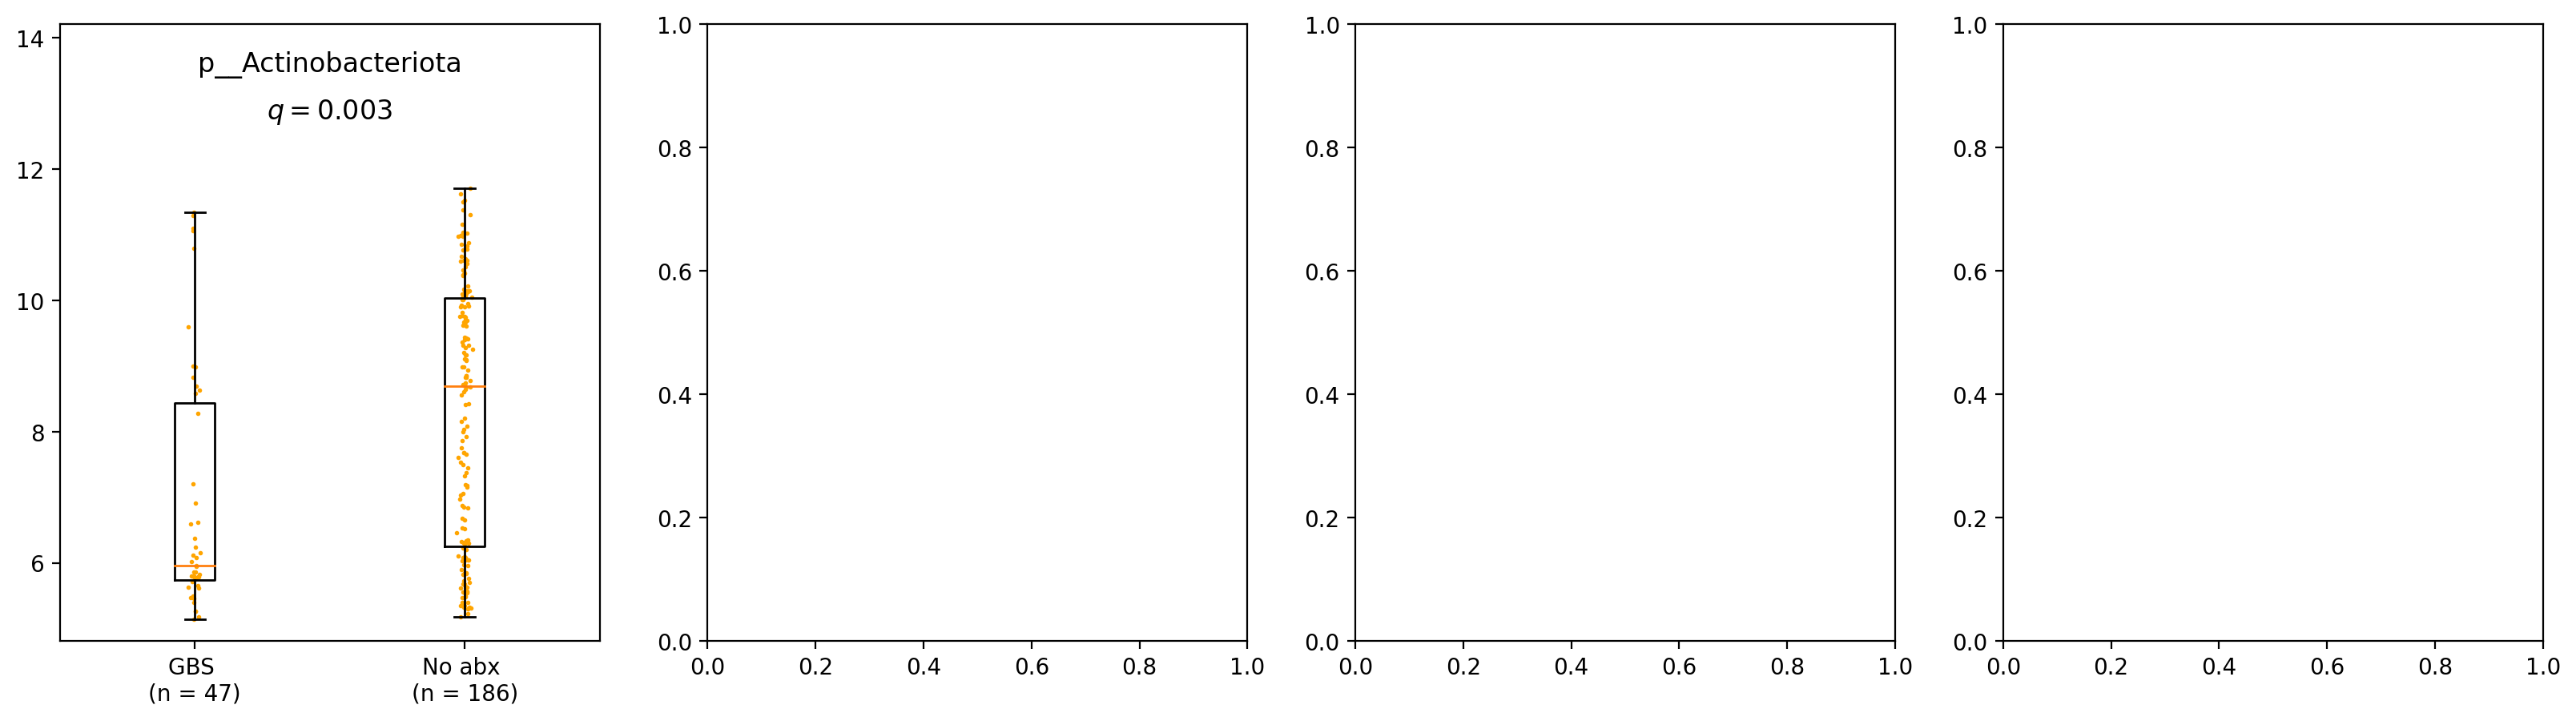

6


58it [00:00, 1342.00it/s]


,taxa,p,q
15,k__Bacteria;p__Campylobacterota,0.008757,0.525394
20,k__Bacteria;p__Dependentiae,0.011909,0.714561
41,k__Bacteria;p__Myxococcota,0.030023,1.801388
24,k__Bacteria;p__Elusimicrobiota,0.032899,1.973918
29,k__Bacteria;p__Firmicutes_B,0.094274,5.656411
45,k__Bacteria;p__Patescibacteria,0.096502,5.790134
27,k__Bacteria;p__Firmicutes,0.105842,6.350493
17,k__Bacteria;p__Cyanobacteria,0.108285,6.497099
28,k__Bacteria;p__Firmicutes_A,0.180421,10.825256
3,k__Archaea;p__Methanobacteriota,0.182253,10.935185


12


58it [00:00, 1310.43it/s]


,taxa,p,q
11,k__Bacteria;p__Bacteroidota,0.014429,0.865761
28,k__Bacteria;p__Firmicutes_A,0.020729,1.243712
12,k__Bacteria;p__Bdellovibrionota,0.078035,4.682089
38,k__Bacteria;p__Krumholzibacteriota,0.120676,7.240578
27,k__Bacteria;p__Firmicutes,0.128033,7.681995
53,k__Bacteria;p__Synergistota,0.141064,8.463830
25,k__Bacteria;p__Eremiobacterota,0.150302,9.018115
2,k__Archaea;p__Halobacteriota,0.159004,9.540257
51,k__Bacteria;p__Schekmanbacteria,0.179700,10.782023
26,k__Bacteria;p__Fibrobacterota,0.194188,11.651251


18


58it [00:00, 236.27it/s]


,taxa,p,q
55,k__Bacteria;p__Verrucomicrobiota,0.072604,4.356248
54,k__Bacteria;p__Thermotogota,0.074940,4.496386
7,k__Bacteria;p__Actinobacteriota,0.091656,5.499388
35,k__Bacteria;p__Fusobacteriota,0.117898,7.073873
29,k__Bacteria;p__Firmicutes_B,0.121339,7.280310
11,k__Bacteria;p__Bacteroidota,0.160201,9.612046
47,k__Bacteria;p__Proteobacteria,0.187662,11.259727
19,k__Bacteria;p__Deinococcota,0.200077,12.004647
37,k__Bacteria;p__KSB1,0.229480,13.768782
24,k__Bacteria;p__Elusimicrobiota,0.252712,15.162720


24


58it [00:00, 1226.79it/s]


,taxa,p,q
21,k__Bacteria;p__Desulfobacterota,0.040112,2.406704
45,k__Bacteria;p__Patescibacteria,0.112121,6.727243
37,k__Bacteria;p__KSB1,0.177314,10.638869
47,k__Bacteria;p__Proteobacteria,0.202088,12.125288
15,k__Bacteria;p__Campylobacterota,0.221894,13.313636
53,k__Bacteria;p__Synergistota,0.277384,16.643061
31,k__Bacteria;p__Firmicutes_D,0.416929,25.015716
41,k__Bacteria;p__Myxococcota,0.416929,25.015716
29,k__Bacteria;p__Firmicutes_B,0.423615,25.416922
12,k__Bacteria;p__Bdellovibrionota,0.428108,25.686471


In [39]:
from sklearn.preprocessing import FunctionTransformer
from skbio.stats.composition import clr
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1 to 5

for taxa_level in range(1, 6):
    
    taxa = species.copy()
    taxa.columns = [";".join(c.split(";")[:-taxa_level]) for c in taxa.columns]
    taxa = taxa.groupby(taxa.columns, axis=1).sum()
    taxa.sum(axis=1)
    
    clr_transformed = pd.DataFrame(clr(taxa), index=taxa.index, columns=taxa.columns)
    
    print("level =", taxa.columns[0].split(";")[-1].split("_")[0])
    
    info_df = clr_transformed.copy()
    
    info_df["time"] = meta["time_cat"]
    info_df["gbs"] = meta["matabx_expo_cat"]
    info_df = info_df[info_df["gbs"] != "Other antibiotics"]
    info_df["gbs"] = info_df["gbs"] == "GBS antibiotics"
    
    for i in [0, 1, 6, 12, 18, 24]:
        print(i)
        analyze_timepoint(i)